In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import os

df = read_csv('%s/app.log' % os.getcwd())

#### Log event model

In [2]:
df.head(1)

,cycle_no,cycle_actor_count,cycle_git_server_cpus,cycle_timeout,event_time,actor_id,actor_type,actor_interval,command_type,command_exit_code,command_result,command_duration
0,0,1,0.05,20,2018-01-15T21:15:33,0,OWN_FILE,5,clone,32768,False,0.078697


#### Average duration over cycles

Text(0,0.5,'avg. duration in seconds')

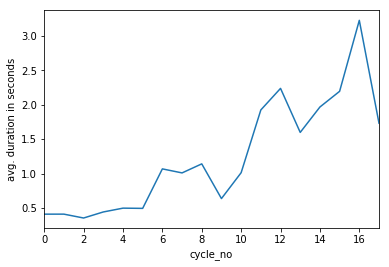

In [3]:
df_avg_over_cycles = df.groupby(['cycle_no'])['command_duration'].mean()
ax = df_avg_over_cycles.plot()
ax.set_ylabel('avg. duration in seconds')

#### Average duration over number of actors

Text(0.5,0,'number of actors')

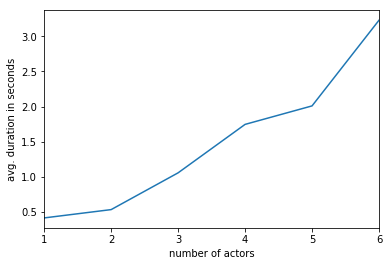

In [4]:
ax = df\
    .groupby(['cycle_actor_count'])['command_duration']\
    .mean()\
    .plot()
ax.set_ylabel('avg. duration in seconds')
ax.set_xlabel('number of actors')

Nearly linear average command execution time increase is noticeable.

#### Each command average duration over number of actors

Text(0.5,0,'number of actors')

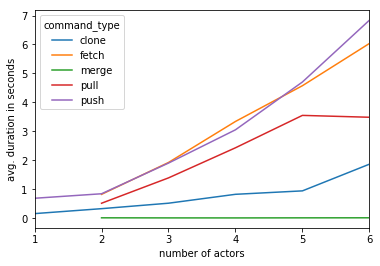

In [5]:
ax = df\
    .groupby(['cycle_actor_count', 'command_type'])['command_duration']\
    .mean()\
    .unstack()\
    .plot()
ax.set_ylabel('avg. duration in seconds')
ax.set_xlabel('number of actors')

Some command types are liable to changes in the quantity of actors (clone, fetch, pull, push), some are not (merge).
The liable commans are those interacting with the server.

Fetch, pull and push commands do not occur for scenario with one actor. Obviously, this happens due to lack of merge conflicts in 'single client' scenario.

Text(0,0.5,'exit code')

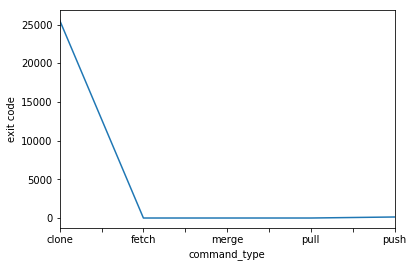

In [6]:
df_avg_over_cycles = df.groupby(['command_type'])['command_exit_code'].mean()
ax = df_avg_over_cycles.plot()
ax.set_ylabel('exit code')

Text(0.5,0,"actor's interval")

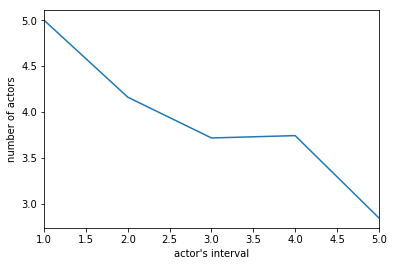

In [11]:
df_avg_over_cycles = df.groupby(['actor_interval'])['cycle_actor_count'].mean()
ax = df_avg_over_cycles.plot()
ax.set_ylabel('number of actors')
ax.set_xlabel('actor\'s interval')
# ax.set_ylabel('Command result (0.2 = False, 1.0 = True)')

Text(0.5,0,'cycle no')

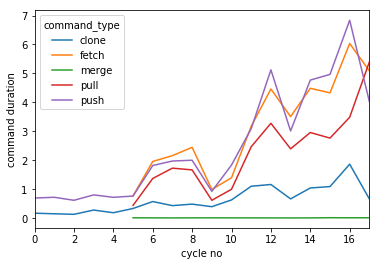

In [16]:
ax = df.groupby(['cycle_no', 'command_type'])['command_duration']\
    .mean()\
    .unstack()\
    .plot()
ax.set_ylabel('command duration')
ax.set_xlabel('cycle no')

Text(0.5,0,'Command exit code')

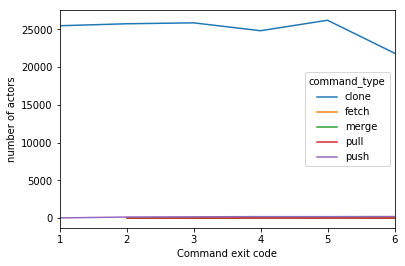

In [24]:
ax = df.groupby(['cycle_actor_count', 'command_type'])['command_exit_code']\
    .mean()\
    .unstack()\
    .plot()
ax.set_ylabel('number of actors')
ax.set_xlabel('Command exit code')